In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

df = pd.read_csv('colchange3.csv')

In [66]:
print(df)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0      259000  21    0      4          1     9     0     0     0     0    0   
1      259000  21    0      4          1     9     0     0     0     0    1   
2      259000  21    0      4          1     9     0     0     0     0    2   
3      259000  21    0      4          1     9     0     0     0     0    3   
4      259000  21    0      4          1     9     0     0     0     0    4   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43948  209000  28    0     10          1     9     0     0     0     0   88   
43949  209000  28    0     10          1     9     0     0     0     0   89   
43950  209000  28    0     10          1     9     0     0     0     0   90   
43951  209000  28    0     10          1     9     0     0     0     0   91   
43952  209000  28    0     10          1     9     0     0     0     0   92   

       nike  jordan  newbalance  adidas  converse  

In [67]:
data= df[(df['day'] == 1)]

In [68]:
print(data)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
1      259000  21    0      4          1     9     0     0     0     0    1   
93     149000  24    0      9          1     9     0     0     0     0    1   
185    139000  17    0      5          2     9     1     0     0     0    1   
278    149000  24    0      2          1     9     0     0     0     0    1   
368     99000  18    0      1          1     9     0     0     0     0    1   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43493  284400  25    0     12          1     6     0     0     0     0    1   
43584  600000  26    0      9          2     1     1     0     0     0    1   
43676  309000  25    0      4          1     4     0     0     0     0    1   
43768  289000  25    0     10          1     9     0     0     0     0    1   
43861  209000  28    0     10          1     9     0     0     0     0    1   

       nike  jordan  newbalance  adidas  converse  

In [69]:
data = data.sample(frac=1).reset_index(drop=True)

In [70]:
print(data)

        발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0    133600  17    0      3          2     2     3     0     0     0    1   
1    159000  17    0     11          3     4     4     1     0     0    1   
2    109000  27    0      6          3     7     1     1     0     0    1   
3    139000  17    0      5          2     4    10     0     0     0    1   
4    149000  29    0      6          2     3     2     0     0     0    1   
..      ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
472  119000  29    0      8          3     4     3     9     0     0    1   
473  289000  25    0      3          1     2     0     0     0     0    1   
474  109000  17    0      2          1     4     0     0     0     0    1   
475  600000  26    0      9          1     9     0     0     0     0    1   
476  229000  11    0      2          4     8     9     1     3     0    1   

     nike  jordan  newbalance  adidas  converse  콜라보유무  type  
0       0   

In [71]:
print(data.isnull().values.any())

False


In [72]:
xy = data["type"]

In [73]:
print(xy)

0      0
1      1
2      0
3      1
4      0
      ..
472    1
473    1
474    1
475    1
476    1
Name: type, Length: 477, dtype: int64


In [74]:
from sklearn.preprocessing import StandardScaler
X = data[['콜라보유무', 'color_num', 'converse', 'jordan', '라인', '콜라보', 'col3', 'col5']]
scaler = StandardScaler()
scaler.fit(X)
scale_X = scaler.fit_transform(X)
scale_X  = np.asarray(scale_X ).astype(np.float64)
y = np.empty((477,2))

In [75]:
print(scale_X)

[[-0.52153619 -0.51900723 -0.30665404 ... -0.29839755 -0.70744174
  -0.07955573]
 [ 1.91741247  0.49146807 -0.30665404 ... -0.29839755 -0.41902319
  -0.07955573]
 [-0.52153619  0.49146807  3.26100389 ... -0.29839755 -0.41902319
  -0.07955573]
 ...
 [-0.52153619 -1.52948253 -0.30665404 ... -0.29839755 -0.70744174
  -0.07955573]
 [ 1.91741247 -1.52948253 -0.30665404 ... -0.29839755 -0.70744174
  -0.07955573]
 [-0.52153619  1.50194337 -0.30665404 ... -0.29839755 -0.41902319
  -0.07955573]]


In [45]:
for i in range(477):
    if xy[i] == 0.0:
        y[i] = [1, 0]
    elif xy[i] == 0:
         y[i] = [1, 0]
    elif xy[i] == '0':
         y[i] = [1, 0]
    else:
        y[i] = [0, 1]

In [46]:
train_x, test_x, train_y, test_y = train_test_split(scale_X, y, test_size = 0.3, random_state = 1)

In [47]:
model = tf.keras.Sequential()  
model.add(layers.Dense(16, input_shape=(8,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.01))        

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(2))
model.add(layers.Activation('softmax')) 

# 모델 구축
model.compile(
    loss= 'binary_crossentropy', 
    optimizer="adam",   
    metrics=['accuracy'])  

In [48]:
hist = model.fit(
    train_x, train_y,
    batch_size = 10,  
    epochs = 200,      
    validation_split = 0.3,
    shuffle = False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)],
    verbose=1)  

# 테스트 데이터로 성능평가
score = model.evaluate(test_x, test_y)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/200
24/24 [==============================] - 0s 18ms/step - loss: 0.6624 - accuracy: 0.6481 - val_loss: 0.6396 - val_accuracy: 0.6900
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5719 - accuracy: 0.7597 - val_loss: 0.5942 - val_accuracy: 0.6900
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.7597 - val_loss: 0.5971 - val_accuracy: 0.6900
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.7597 - val_loss: 0.5961 - val_accuracy: 0.6900
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.7597 - val_loss: 0.5962 - val_accuracy: 0.6900
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.7597 - val_loss: 0.5981 - val_accuracy: 0.6900
Epoch 7/200
24/24 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7597 - val_loss: 0.6029 - val_accuracy: 0.6900
Epoch 8/200


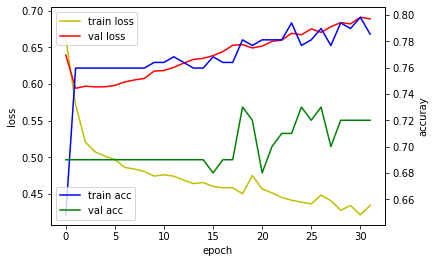

In [49]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [50]:
y_pred = model.predict(test_x)

In [51]:
print(y_pred)

[[2.40052506e-01 7.59947479e-01]
 [1.19681833e-02 9.88031745e-01]
 [4.73001271e-01 5.26998758e-01]
 [8.46524462e-02 9.15347636e-01]
 [4.79629129e-01 5.20370901e-01]
 [2.76695430e-01 7.23304570e-01]
 [1.19681833e-02 9.88031745e-01]
 [1.83858406e-02 9.81614232e-01]
 [6.26959622e-01 3.73040348e-01]
 [4.36861306e-01 5.63138664e-01]
 [4.72924784e-02 9.52707529e-01]
 [6.18967533e-01 3.81032467e-01]
 [2.74509043e-01 7.25490928e-01]
 [1.77129637e-02 9.82287109e-01]
 [1.23843074e-01 8.76156867e-01]
 [2.40052506e-01 7.59947479e-01]
 [6.08164310e-01 3.91835690e-01]
 [2.40052506e-01 7.59947479e-01]
 [5.32164514e-01 4.67835486e-01]
 [4.39365357e-01 5.60634673e-01]
 [3.84560168e-01 6.15439832e-01]
 [2.40052506e-01 7.59947479e-01]
 [2.48180144e-02 9.75181997e-01]
 [4.73001271e-01 5.26998758e-01]
 [2.40052506e-01 7.59947479e-01]
 [4.53304142e-01 5.46695828e-01]
 [3.20276737e-01 6.79723263e-01]
 [4.42031741e-01 5.57968259e-01]
 [9.84749123e-02 9.01525080e-01]
 [9.75310377e-06 9.99990225e-01]
 [6.482350

In [52]:
y_class = y_pred.argmax(axis=-1)
y_class

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [53]:
print(test_y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

In [54]:
print(test_y[1][1])

1.0


In [55]:
test_act = []
for i in range(len(test_y)):
    if test_y[i][1] == 1.0:
        test_act.append(0)
    else:
        test_act.append(1)

In [56]:
print(test_act)

[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0]


In [57]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score
precision = precision_score(test_act, y_class, average= "weighted")
print(precision)

0.42645719489981787


In [58]:
recall = recall_score(test_act, y_class, average= "weighted")
print(recall)

0.2638888888888889


In [59]:
print(y_class)

[1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [60]:
print(test_y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

In [61]:
print(xy)

0      1.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
472    NaN
473    0.0
474    1.0
475    0.0
476    1.0
Name: type, Length: 477, dtype: float64


In [62]:
print(f1_score(test_act,y_class, average= "weighted"))

0.21558159722222225


In [63]:
confusion_matrix(test_act, y_class)

array([[11, 95],
       [11, 27]], dtype=int64)